## 绘制逻辑回归的决策边界

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
X = iris.data
y = iris.target

In [3]:
X = X[y < 2, :2]  # 数据集有三个分类，这一步处理对应二分类
y = y[y < 2]

In [4]:
X.shape

(100, 2)

In [5]:
y.shape

(100,)

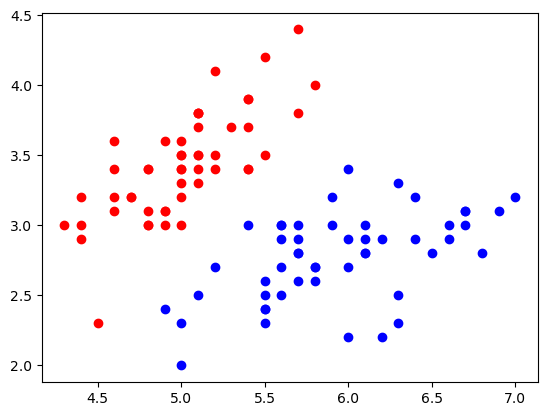

In [6]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue")
plt.show()

### 使用逻辑回归

In [7]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
from playML.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [9]:
log_reg.score(X_test, y_test)

1.0

In [10]:
log_reg.predict_proba(X_test)

array([0.91710324, 0.97828082, 0.06816308, 0.03505349, 0.95703964,
       0.09869757, 0.91710324, 0.9735544 , 0.93120582, 0.21315537,
       0.181273  , 0.05684999, 0.06842341, 0.028949  , 0.15323071,
       0.99671099, 0.98376264, 0.97836758, 0.89159671, 0.0752819 ])

In [11]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [12]:
y_test

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [13]:
log_reg.coef_

array([ 3.00559951, -5.02297008])

In [14]:
log_reg.intercept_

-0.6639768541084616

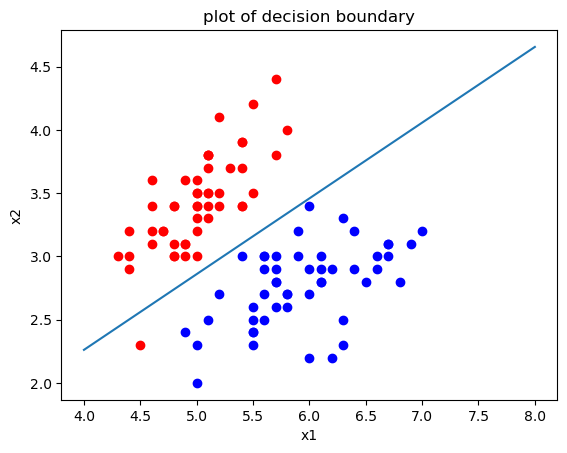

In [15]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_) / (log_reg.coef_[1])

x1_plot = np.linspace(4, 8, 1000) #4和8的取值是看上面的那个图像的，横坐标的数据左端大概是4，右端大概是8
x2_plot = x2(x1_plot)
plt.title("plot of decision boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red")
plt.plot(x1_plot, x2_plot)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue")
plt.show()

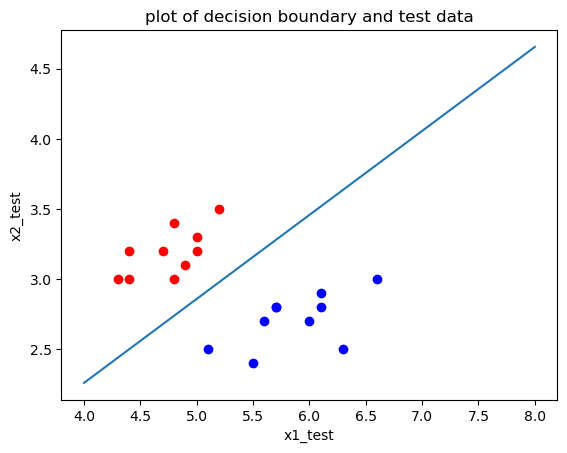

In [16]:
# 查看测试数据中的样本分布
plt.title("plot of decision boundary and test data")
plt.xlabel("x1_test")
plt.ylabel("x2_test")
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color="red")
plt.plot(x1_plot, x2_plot)
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color="blue")
plt.show()

/var/folders/f5/bqjk58nj4n1dmsy3hkgvyky40000gn/T/ipykernel_35372/3361848099.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


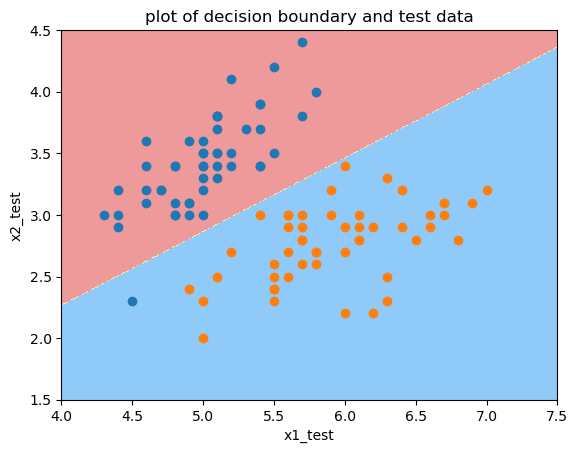

In [18]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

plt.title("plot of decision boundary and test data")
plt.xlabel("x1_test")
plt.ylabel("x2_test")
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## kNN的决策边界

/var/folders/f5/bqjk58nj4n1dmsy3hkgvyky40000gn/T/ipykernel_35372/3361848099.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


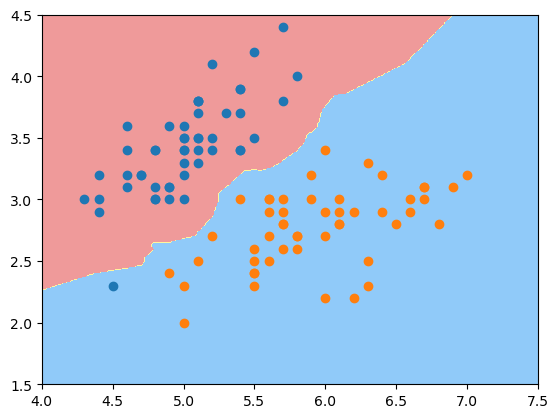

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [20]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier()

/var/folders/f5/bqjk58nj4n1dmsy3hkgvyky40000gn/T/ipykernel_35372/3361848099.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


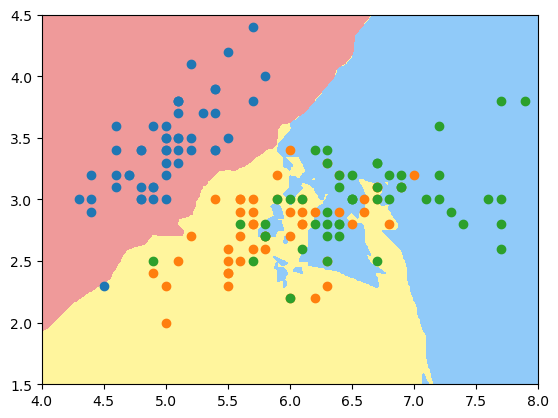

In [21]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

/var/folders/f5/bqjk58nj4n1dmsy3hkgvyky40000gn/T/ipykernel_35372/3361848099.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


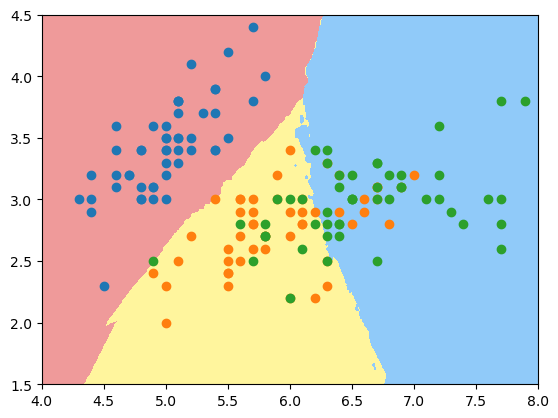

In [22]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()